In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
df = pd.read_csv(r"C:\Users\SAYAN GHOSH\Downloads\ML Datasets\Dataset.csv")
df.head()

,Age,Anaemia,Creatinine Phosphokinase,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
0,75.0,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000,2.7,116,0,0,8,1


In [3]:
x = df.drop(columns = ["Death Event"])
y = df["Death Event"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

In [4]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(
    iterations = 350,
    learning_rate = 0.02,
    max_depth = 3,
    random_seed = 50,
    early_stopping_rounds = 50,
    verbose = 0,
    use_best_model = True)

cb.fit(x_train, y_train, eval_set=(x_test, y_test))
y_cb_train_prediction = cb.predict(x_train)
y_cb_test_prediction = cb.predict(x_test)

In [5]:
cb_train_mse = mean_squared_error(y_train, y_cb_train_prediction)
cb_train_rs = r2_score(y_train, y_cb_train_prediction)
cb_train_as = accuracy_score(y_train, y_cb_train_prediction)
cb_test_mse = mean_squared_error(y_test, y_cb_test_prediction)
cb_test_rs = r2_score(y_test, y_cb_test_prediction)
cb_test_as = accuracy_score(y_test, y_cb_test_prediction)

cb_result = pd.DataFrame(["Cat Boost Regressor", cb_train_mse, cb_train_rs, cb_train_as, cb_test_mse, cb_test_rs, cb_test_as]).transpose()
cb_result.columns = ["Method", "Training MSE", "Training RS", "Training Accuracy", "Test MSE", "Test RS", "Test Accuracy"]
cb_result

,Method,Training MSE,Training RS,Training Accuracy,Test MSE,Test RS,Test Accuracy
0,Cat Boost Regressor,0.054393,0.749193,0.945607,0.133333,0.4,0.866667


[]

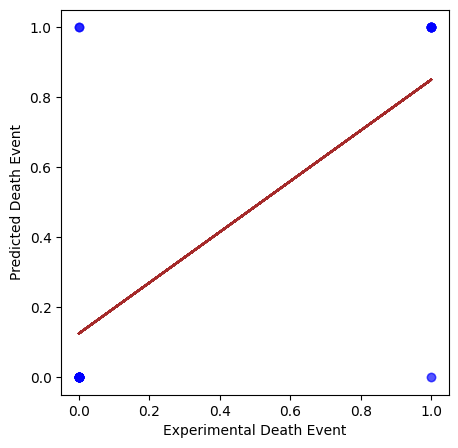

In [6]:
plt.figure(figsize = (5,5))
plt.scatter(x = y_test, y = y_cb_test_prediction, c = "blue", alpha=0.3)
plt.xlabel("Experimental Death Event")
plt.ylabel("Predicted Death Event")

z = np.polyfit(y_test, y_cb_test_prediction, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "brown")
plt.plot()

In [7]:
sample1 = pd.DataFrame({
    'Age': [75],
    'Anaemia': [0],
    'Creatinine Phosphokinase': [582],
    'Diabetes': [0],
    'Ejection Fraction': [20],
    'High Blood Pressure': [1],
    'Platelets': [265000],
    'Serum Creatinine': [1.9],
    'Serum Sodium': [130],
    'Sex': [1], 
    'Smoking': [0],
    'Time': [4]
})

sample2 = pd.DataFrame({
    'Age': [62],
    'Anaemia': [0],
    'Creatinine Phosphokinase': [61],
    'Diabetes': [1],
    'Ejection Fraction': [38],
    'High Blood Pressure': [1],
    'Platelets': [155000],
    'Serum Creatinine': [1.1],
    'Serum Sodium': [143],
    'Sex': [1], 
    'Smoking': [1],
    'Time': [270]
})

sample3 = pd.DataFrame({
    'Age': [40],
    'Anaemia': [0],
    'Creatinine Phosphokinase': [120],
    'Diabetes': [0],
    'Ejection Fraction': [60],
    'High Blood Pressure': [1],
    'Platelets': [350000],
    'Serum Creatinine': [1.0],
    'Serum Sodium': [135],
    'Sex': [0],
    'Smoking': [0],
    'Time': [120]
})

sample4 = pd.DataFrame({
    'Age': [70],
    'Anaemia': [0],
    'Creatinine Phosphokinase': [980],
    'Diabetes': [1],
    'Ejection Fraction': [40],
    'High Blood Pressure': [1],
    'Platelets': [200000],
    'Serum Creatinine': [2.0],
    'Serum Sodium': [40],
    'Sex': [1],
    'Smoking': [1],
    'Time': [285]
})

sample5 = pd.DataFrame({
    'Age': [50],
    'Anaemia': [1],
    'Creatinine Phosphokinase': [100],
    'Diabetes': [0],
    'Ejection Fraction': [85],
    'High Blood Pressure': [0],
    'Platelets': [250000],
    'Serum Creatinine': [1.3],
    'Serum Sodium': [125],
    'Sex': [1],
    'Smoking': [1],
    'Time': [250]
})

sample6 = pd.DataFrame({
    'Age': [95],
    'Anaemia': [1],
    'Creatinine Phosphokinase': [4500],
    'Diabetes': [1],
    'Ejection Fraction': [10],
    'High Blood Pressure': [1],
    'Platelets': [1000],
    'Serum Creatinine': [4.5],
    'Serum Sodium': [10],
    'Sex': [1],
    'Smoking': [1],
    'Time': [2]
})

sample7 = pd.DataFrame({
    'Age': [30],
    'Anaemia': [0],
    'Creatinine Phosphokinase': [80],
    'Diabetes': [1],
    'Ejection Fraction': [40],
    'High Blood Pressure': [1],
    'Platelets': [40000],
    'Serum Creatinine': [0.7],
    'Serum Sodium': [145],
    'Sex': [1],
    'Smoking': [1],
    'Time': [10]
})

In [8]:
cb_sample1_result = cb.predict(sample1)
print(f"Cat Boost Regressor Predicted Result For Sample1: {cb_sample1_result[0]:.2f}")
cb_sample2_result = cb.predict(sample2)
print(f"Cat Boost Regressor Predicted Result For Sample2: {cb_sample2_result[0]:.2f}")
cb_sample3_result = cb.predict(sample3)
print(f"Cat Boost Regressor Predicted Result For Sample3: {cb_sample3_result[0]:.2f}")
cb_sample4_result = cb.predict(sample4)
print(f"Cat Boost Regressor Predicted Result For Sample4: {cb_sample4_result[0]:.2f}")
cb_sample5_result = cb.predict(sample5)
print(f"Cat Boost Regressor Predicted Result For Sample5: {cb_sample5_result[0]:.2f}")
cb_sample6_result = cb.predict(sample6)
print(f"Cat Boost Regressor Predicted Result For Sample6: {cb_sample6_result[0]:.2f}")
cb_sample7_result = cb.predict(sample7)
print(f"Cat Boost Regressor Predicted Result For Sample7: {cb_sample7_result[0]:.2f}")

Cat Boost Regressor Predicted Result For Sample1: 1.00
Cat Boost Regressor Predicted Result For Sample2: 0.00
Cat Boost Regressor Predicted Result For Sample3: 0.00
Cat Boost Regressor Predicted Result For Sample4: 0.00
Cat Boost Regressor Predicted Result For Sample5: 0.00
Cat Boost Regressor Predicted Result For Sample6: 1.00
Cat Boost Regressor Predicted Result For Sample7: 1.00


In [9]:
pickle.dump(cb, open('Model.pkl', 'wb'))